# Efectos fotográficos

In [ ]:
Objetivo:
Escribir una variedad de mejoras fotograficas o efectos de filtro: contraste, solarización, etc. 

## Teoría
Primero necesitamos entender que las imágenes son básicamente matrices llenas de números que van del 0 al 255, que es un rango de 8 bits. Estos valores corresponden al nivel de brillo de cada píxel y dependen del rango de bits en que se encuentran. Estos rangos se extienden entre 8 bits y 30 bits. El rango de 24 bits se conoce comúnmente como _color verdadero_. El razonamiento detrás de es to es que involucra rangos de 3, 8 bits para cada canal en RGB.



Ahroa que entendemos como se estructura una imágen, podemos hablar del __Kernel__. Esta es la estructura fundamental detrás del filtrado de imágenes. Los __Kernel__ son bloques de píxeles minificados con el próposito de recorrer toda la imagen y aplicar operaciones matemáticas sobre los píxeles correspondientes en los que se encuentra actualmente. Esta operación se llama _"Convoluición 2D"_. 

### ¿Cómo funciona exactamente?
- Paso #1: elegir el tamaño del kernel.

Se comienza eligiendo el tamaño del Kernel a usar, este generalmente es de 3x3. El tamaño del kernel cambia la propiedad de localización de la característica. Si este es grande, es más probable que las funciones sean globales en lugar de locales. Además de eso, los kernel más grandes son menos eficientes computacionalmente debido a una mayor cantidad de cálculos individuales.

- Paso #2: completar el filtro con los valores específicos del Kernel.

Estos valores son el factor determinante del comportamiento del filtro. Se pueden configurar para muchos própositos, como desenfocar, enfocar - desenfocar, detección de bordes, etc.

<img src="./Resources/KernelSamples-1.webp">

- Paso #3: Colocar el filtro en la imagen.

Después de decidir los valores del filtro, se debe colocar en el pixel izquierdo superio. Luego, cada píxel se multiplica por su correspondiente equivalente en la imagen y se resume el resultado. Para preservar el brillo original, debe normalizarse. Por lo tanto, divida la suma por el número de eleementos del Kernel.

- Paso #4: aplicar el filtro. 

Finalmente, aplique el paso anterior a la imagen desde el píxel superior izquierdo hasta el píxel inferior derecho, fila por fila. En este paso es importante no sobre escribir la imagen porque las operaciones anteriores problamente interferirán con las siguientes.

## Aplicar los filtros
- Paso #1: importar las librerías.

In [16]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

- Paso #2: cargar la imagen que vamos a utilizar.

In [29]:
img = cv2.imread('./Resources/landscape.jpg')

# Corregimos los colores de opencv RGB a matplotlib BGR.
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Aplicamos un pequeño ajuste al tamaño de la imagen.
#im_resized = cv2.resize(img, (0, 0), None, .25, .25)

- Paso #3: definir los kernels para cada uno de los filtros.

In [30]:
gaussianBlurKernel = np.array(([[1, 2, 1], [2, 4, 2], [1, 2, 1]]), np.float32)/9
sharpenKernel = np.array(([[0, -1, 0], [-1, 9, -1], [0, -1, 0]]), np.float32)/9
meanBlurKernel = np.ones((3, 3), np.float32)/9

- Paso #4: aplicar los filtros.

In [31]:
gaussianBlur = cv2.filter2D(src=img, kernel=gaussianBlurKernel, ddepth=-1)
meanBlur = cv2.filter2D(src=img, kernel=meanBlurKernel, ddepth=-1)
sharpen = cv2.filter2D(src=img, kernel=sharpenKernel, ddepth=-1)

- Paso #5: Visualizar el resultado de aplicar los filtros.

&lt;matplotlib.image.AxesImage at 0xf132568&gt;

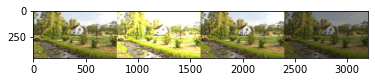

In [32]:
# Concatenamos las imágenes para poder visualizarlas.
horizontalStack = np.concatenate((img, gaussianBlur, meanBlur, sharpen), axis=1)

# Mostramos la imagen.
plt.imshow(horizontalStack)

# Otros ejemplos

### Laplace 

&lt;matplotlib.image.AxesImage at 0xf17eb68&gt;

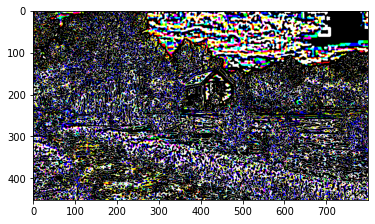

In [37]:
frame = cv2.Laplacian(img, -1, ksize=17, scale=1, delta=0, borderType=cv2.BORDER_DEFAULT)
plt.imshow(frame)

###  Gaussian Blur

&lt;matplotlib.image.AxesImage at 0xf1ba5f8&gt;

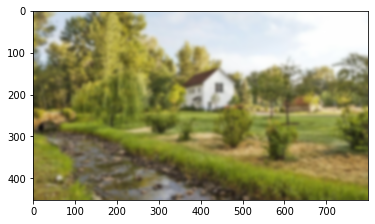

In [39]:
frame = cv2.GaussianBlur(img, (21,21), 0)
plt.imshow(frame)

### Sobel X and Sobel Y Filters

&lt;matplotlib.image.AxesImage at 0xf201328&gt;

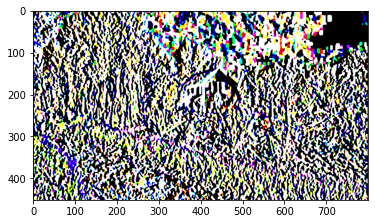

In [41]:
frame = cv2.Sobel(img,-1, dx=1, dy=0, ksize=11, scale=1, delta=0, borderType=cv2.BORDER_DEFAULT)
plt.imshow(frame)